In [1]:
import pandas as pd
food_df_clean = pd.read_csv("../dataset/food_preprocessed.csv")
food_df_clean

,Unnamed: 0,类别,行政区,点评数,口味,环境,服务,人均消费
0,0,烧烤,K,176.0,8.0,8.6,7.9,124.0
1,2,粤菜,K,141.0,6.7,7.2,6.6,141.0
2,3,海鲜,K,76.0,7.2,7.2,7.3,148.0
3,4,烧烤,K,600.0,7.2,7.6,7.0,143.0
4,5,本菜,J,69.0,8.2,8.9,8.4,66.0
...,...,...,...,...,...,...,...,...
40557,96381,浙菜,N,169.0,7.7,7.0,7.4,76.0
40558,96386,浙菜,N,10.0,7.5,7.0,7.2,58.0
40559,96387,亚菜,K,216.0,7.0,7.1,7.1,49.0
40560,96388,甜点,A,218.0,8.2,7.9,8.1,33.0


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import json

model_maps = {}

for i in food_df_clean.groupby("行政区"):
  dt_id, dt_df = i
  for j in dt_df.groupby("类别"):
    classification, df = j
    features = food_df_clean[["环境", "口味", "服务", "人均消费"]]
    x, y = features.iloc[:, 0:-1], features.iloc[:, -1]
    model = KMeans(n_clusters=3)
    model.fit(x)
    model_maps[dt_id + "," + classification] = model.cluster_centers_
    print(model.score(x))

print(model_maps)

-11976.005054724039
-11975.674443567914
-11977.195178178576
-11974.350257662847
-11975.995820478127
-11977.682547480308
-11977.593149322862
-11977.682547480308
-11977.201550309888
-11977.682547480308
-11958.014233583739
-11976.005054724039
-11958.098076266773
-11977.43663706558
-11975.674443567914
-11977.593149322864
-11977.593149322864
-11975.399563768857
-11975.674443567914
-11977.195178178576
-11977.43663706558
-11976.005054724039
-11975.674443567914
-11975.674443567912
-11958.01835919606
-11958.032993185974
-11977.415711496715
-11958.14582834205
-11958.032993185974
-11977.593149322864
-11977.593149322864
-11975.399563768853
-11977.593149322864
-11975.399563768853
-11976.634743742594
-11976.005054724039
-11958.051224178524
-11958.021306298342
-11958.018981489255
-11976.005054724039
-11977.682547480308
-11975.674443567914
-11975.320653400888
-11977.195178178577
-11977.415711496715
-11977.593149322864
-11977.682547480308
-11975.674443567912
-11977.415711496715
-11958.063524362164
-119

TypeError: Object of type ndarray is not JSON serializable

In [ ]:
for k in model_maps:
  model_maps[k] = list(map(list, model_maps[k]))
with open("data.json", mode="w", encoding="utf-8") as f:
  f.write(json.dumps(model_maps, ensure_ascii=False));

'{"A,亚菜": [[6.905850348453356, 7.027588947304071, 6.903521212862208], [8.523189087488241, 8.426234713076198, 8.478116180620885], [7.6052866242038215, 7.634273885350319, 7.567624203821656]], "A,助餐": [[7.604417107527567, 7.633360953534323, 7.566855758811906], [6.905523949348504, 7.027448461491405, 6.9033339450663735], [8.522144030025803, 8.425357729298616, 8.476683087027915]], "A,北菜": [[7.550002995267477, 7.586683040795543, 7.517132929970646], [8.490244434744653, 8.396224356176342, 8.442132256656482], [6.869316558993539, 6.996572594355661, 6.867745664739885]], "A,南菜": [[8.51982969788872, 8.422395894086083, 8.474687973871458], [6.9001486712506965, 7.025144025274112, 6.898823019265317], [7.599425722579831, 7.6271614287517355, 7.561289915436072]], "A,啡厅": [[6.905850348453356, 7.027588947304071, 6.903521212862208], [8.52318636096414, 8.426078777189888, 8.478106995884774], [7.6052296324606665, 7.634307917701764, 7.567571182877891]], "A,川菜": [[8.488254486133767, 8.39516041326808, 8.44069603045

C:\Users\samyyc\AppData\Local\Temp\ipykernel_37604\976899266.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="PCA", y='人均消费', data=df, palette="Set2")
d:\miniconda3\envs\dataanalysis\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\miniconda3\envs\dataanalysis\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\miniconda3\envs\dataanalysis\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28040 (\N{CJK UNIFIED IDEOGRAPH-6D88}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\miniconda3\envs\dataanalysis\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36153 (\N{CJK UNIFIED IDEOGRAPH-8D39}) missing from current font.

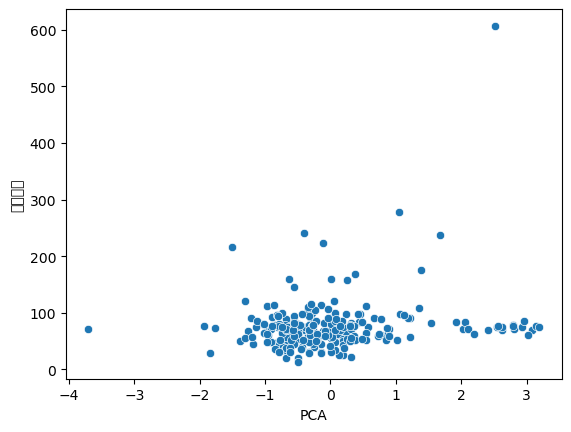

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
# food_df_clean = food_df_clean[food_df_clean["人均消费"] < 300]
# food_df_clean = food_df_clean[food_df_clean["点评数"] > 50]
food_df_clean = food_df_clean[food_df_clean["行政区"] == "N"]
food_df_clean = food_df_clean[food_df_clean["类别"] == "浙菜"]

features = food_df_clean[["环境", "口味", "服务", "人均消费"]]
x, y = features.iloc[:, 0:-1], features.iloc[:, -1]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
#pca 降维
a = x.apply(lambda row: row.sum(), axis=1)
pca = PCA(n_components=1)
reduced_features = pca.fit_transform(x)
df = pd.DataFrame({
    "PCA": a,
    "人均消费": y})
# kmeans = KMeans(n_clusters=3, random_state=42)
# food_df_clean["Cluster"] = kmeans.fit_predict(scaled_features)



sns.scatterplot(x="PCA", y='人均消费', data=df, palette="Set2")
plt.show()


In [ ]:
test = food_df_clean
test = test.drop(columns=["Unnamed: 0"])
test = test[test["人均消费"] < 300]
test = test[test["点评数"] > 50]
x, y = test.iloc[:, :-1], test.iloc[:, -1]
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import silhouette_score
import numpy as np 
# onehot for column A

x = pd.get_dummies(x)
# x["A"] = x["口味"] * x["环境"]
# x["B"] = x["环境"] * x["服务"]
# # x["C"] = x["口味"] * x["服务"]
# x["D"] = x["口味"] + x["环境"] + x["服务"]
x[["口味", "环境", "服务"]] = (x[["口味", "环境", "服务"]] - x[["口味", "环境", "服务"]].mean()) / x[["口味", "环境", "服务"]].std()
# x[["A", "B"]] = (x[["A", "B"]] - x[["A", "B"]].mean()) / x[["A", "B"]].std()
# x[["D"]] = (x[["D"]] - x[["D"]].mean()) / x[["D"]].std()

#x[["点评数"]] = np.log10(x[["点评数"]] + 1)
x[["点评数"]] = (x[["点评数"]] - x[["点评数"]].mean()) / x[["点评数"]].std()
print(x)
#model = MLPRegressor(hidden_layer_sizes=[64, 64, 32, 16], max_iter=10000, verbose=True, early_stopping=True, n_iter_no_change=20, activation="relu", random_state=42)
# sklearn xgboost
from xgboost import XGBRegressor
# adaboost
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
model = AdaBoostRegressor( random_state=42, n_estimators=256)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model.score(X_test, y_test))
data = pd.DataFrame({"y": y_test, "y_pred": y_pred})
data[50:]
# alt.Chart(data).encode(
#     x="y",
#     y="y_pred"
# ).mark_point()

            点评数        口味        环境        服务  类别_亚菜  类别_助餐  类别_北菜  类别_午茶  \
0     -0.372424  0.463833  1.299514  0.400704  False  False  False  False   
1     -0.390852 -1.648935 -0.652362 -1.451752  False  False  False  False   
2     -0.425075 -0.836332 -0.652362 -0.454276  False  False  False  False   
3     -0.149182 -0.836332 -0.094683 -0.881766  False  False  False  False   
4     -0.428761  0.788874  1.717773  1.113187  False  False  False  False   
...         ...       ...       ...       ...    ...    ...    ...    ...   
40551 -0.224474  2.251560  0.044737  1.683173  False  False  False  False   
40555 -0.416651 -1.323894 -1.488880 -1.451752  False  False  False  False   
40557 -0.376109 -0.023729 -0.931201 -0.311779  False  False  False  False   
40559 -0.351363 -1.161373 -0.791782 -0.739269   True  False  False  False   
40560 -0.350310  0.788874  0.323576  0.685697  False  False  False  False   

       类别_南菜  类别_啡厅  ...  行政区_I  行政区_J  行政区_K  行政区_L  行政区_M  行政区_N  行政区_Q  

,y,y_pred
16527,175.0,133.378176
22519,43.0,88.373728
34913,50.0,91.395007
2939,58.0,91.395007
20291,41.0,79.291228
...,...,...
19034,10.0,59.449704
40065,26.0,88.373728
2666,15.0,79.291228
10966,122.0,136.490409


In [14]:
test = food_df_clean
test = test.drop(columns=["Unnamed: 0"])
test = test[test["人均消费"] < 300]
test = test[(test["类别"] != "甜点") & (test["类别"] != "啡厅")]
# test = test[test["点评数"] > 50]
# test = test[(test["行政区"] == "K") & (test["类别"] == "烧烤")]
# x = test.drop(columns=["类别","行政区","点评数"]).copy()

# from sklearn.cluster import KMeans
# best_score = None
# best_cluster = None
# model = KMeans(n_clusters=4)
# model.fit(x)
# score = model.score(x)
# score
# model.cluster_centers_
x = test
x2 = x[(x["口味"] > 9) | (x["环境"] > 9) | (x["服务"] > 9)]
# save dataframe to csv
import altair as alt
alt.Chart(x2).encode(y="人均消费").mark_boxplot()
x2[x2["人均消费"] == 20]

,类别,行政区,点评数,口味,环境,服务,人均消费
8839,美食,G,80.0,8.3,9.1,9.0,20.0
32246,快餐,J,423.0,9.1,8.6,8.8,20.0


In [142]:
np.mean((y-y_pred)**2)

np.float64(6789.322312783615)

In [33]:
df = food_df_clean#.drop(columns=['Unnamed: 0'])
df = df[df["人均消费"] < 300]
df = df[df["点评数"] > 50]
len(df)

25636

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# 定义特征列
categorical_features = ['类别', '行政区']
numerical_features = ['点评数', '口味', '环境', '服务']

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # 填补缺失值
    ('scaler', StandardScaler()),  # 标准化处理
    ('poly_features', FunctionTransformer(
        lambda x: np.hstack([
            x,  # 原始特征
            x[:, [0]] * x[:, [1]],  # 点评数 * 口味
            x[:, [2]] * x[:, [3]],  # 环境 * 服务
            np.sum(x[:, 1:], axis=1).reshape(-1, 1)  # 评分总和
        ])
    ))
])

# 2. 类别特征处理
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # 填补缺失值
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # 独热编码
])

# 3. 聚类特征生成
def cluster_feature(df, n_clusters=9):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df[['口味', '环境', '服务']])
    df['cluster_label'] = cluster_labels
    print(f"Cluster inertia: {kmeans.inertia_}")
    return df

#df = cluster_feature(df)

# 4. 统计特征生成
def generate_statistics(df, group_col, target_col):
    stats = df.groupby(group_col)[target_col].agg(['mean', 'std']).reset_index()
    stats.columns = [group_col, f'{target_col}_mean', f'{target_col}_std']
    return df.merge(stats, on=group_col, how='left')

df = generate_statistics(df, '类别', '人均消费')
df = generate_statistics(df, '行政区', '人均消费')

# 合并处理管道
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

# 转换后的数据
X = preprocessor.fit_transform(df)
y = df['人均消费']

# model = MLPRegressor(hidden_layer_sizes=[64, 64, 32, 16], max_iter=10000, verbose=True, early_stopping=True, n_iter_no_change=50, activation="relu")
# model.fit(X, y)

MergeError: Passing 'suffixes' which cause duplicate columns {'人均消费_std_x', '人均消费_mean_x'} is not allowed.

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# set default device as cuda
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [32]:


# 1. 数据准备
# 使用特征工程后的数据
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# 确保稀疏矩阵转为稠密矩阵
X_train_dense = X_train.toarray() if hasattr(X_train, "toarray") else X_train
X_test_dense = X_test.toarray() if hasattr(X_test, "toarray") else X_test
# 转换为 PyTorch 张量
# 转换为 PyTorch 的 Tensor 数据类型
X_train_tensor = torch.tensor(X_train_dense, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1).to(device)
X_test_tensor = torch.tensor(X_test_dense, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1).to(device)

# 2. 定义模型
class ConsumptionPredictionModel(nn.Module):
    def __init__(self, input_dim):
        super(ConsumptionPredictionModel, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 32),  
            nn.ReLU(),
            nn.Linear(32, 64),  
            nn.ReLU(),
            nn.Linear(64, 32),  
            nn.ReLU(),
            nn.Linear(32, 1),
        )

    def forward(self, x):
        return self.fc(x)

# 获取输入特征的维度
input_dim = X_train.shape[1]

# 实例化模型
model = ConsumptionPredictionModel(input_dim).to(device)

# 3. 定义损失函数和优化器
criterion = nn.MSELoss()  # 均方误差损失
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam 优化器

# 4. 训练模型
epochs = 10000
for epoch in range(epochs):
    model.train()  # 切换到训练模式
    optimizer.zero_grad()  # 梯度清零
    predictions = model(X_train_tensor)  # 前向传播
    loss = criterion(predictions, y_train_tensor)  # 计算损失
    loss.backward()  # 反向传播
    optimizer.step()  # 更新参数

    if (epoch + 1) % 10 == 0:
        sample_data = X_test_tensor
        sample_label = y_test
        sample_predictions = model(sample_data).cpu().detach().numpy().squeeze()
        mse = np.mean((sample_predictions-sample_label)**2)
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}, MSE: {mse}")

# 5. 评估模型
model.eval()  # 切换到评估模式
with torch.no_grad():
    test_predictions = model(X_test_tensor)
    test_loss = mean_squared_error(y_test, test_predictions.numpy())
    print(f"Test MSE: {test_loss:.4f}")
    

# 6. 使用模型预测
# 示例预测
sample_data = X_test_tensor[:5]  # 取测试集前 5 条数据
sample_predictions = model(sample_data).detach().numpy()
print("Sample Predictions:", sample_predictions)

Epoch [10/10000], Loss: 6754.1040, MSE: 6925.205234322318
Epoch [20/10000], Loss: 6705.8779, MSE: 6872.514825600907
Epoch [30/10000], Loss: 6604.7720, MSE: 6759.901871917694
Epoch [40/10000], Loss: 6378.2319, MSE: 6509.005091915032
Epoch [50/10000], Loss: 5916.0181, MSE: 6002.938195655377
Epoch [60/10000], Loss: 5097.6675, MSE: 5121.907905796517
Epoch [70/10000], Loss: 3945.7812, MSE: 3913.809417971532
Epoch [80/10000], Loss: 2912.0615, MSE: 2883.0748127827746
Epoch [90/10000], Loss: 2598.3914, MSE: 2572.9778900995766
Epoch [100/10000], Loss: 2472.1787, MSE: 2411.0177402327377
Epoch [110/10000], Loss: 2321.8772, MSE: 2271.5957327045103
Epoch [120/10000], Loss: 2215.2275, MSE: 2161.4596814758997
Epoch [130/10000], Loss: 2102.2976, MSE: 2038.2350528026539
Epoch [140/10000], Loss: 1995.1379, MSE: 1924.2360208009968
Epoch [150/10000], Loss: 1888.1608, MSE: 1815.4836561068298
Epoch [160/10000], Loss: 1786.4811, MSE: 1712.8768672154254
Epoch [170/10000], Loss: 1694.6991, MSE: 1620.3051214800

KeyboardInterrupt: 

In [24]:
sample_data = X_test_tensor
sample_label = y_test
sample_predictions = model(sample_data).cpu().detach().numpy().squeeze()
# combind predictions and label
pred = pd.DataFrame({
    "predictions":sample_predictions,
    "label":sample_label})
## calculate mse
mse = np.mean((sample_predictions-sample_label)**2)
pred

,predictions,label
31184,36.350319,22.0
21867,28.912262,19.0
17367,151.165176,125.0
32896,37.511459,37.0
39446,30.235872,40.0
...,...,...
27287,23.495035,36.0
27010,110.108154,114.0
1826,96.491974,101.0
29820,73.358963,79.0
